<a href="https://colab.research.google.com/github/abiyasa05/Machine_Learning_Ganjil_2023/blob/main/Kuis_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KUIS 1**

In [1]:
# Menginstal beberapa paket Python yang umum digunakan.
%pip install torch torchvision numpy matplotlib pandas

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Download MNIST dataset menggunakan torchvision
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 108893667.76it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 86156254.50it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29072292.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14432218.76it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Ekstrak data dan label
data_mnist = mnist_dataset.data
label = mnist_dataset.targets

**Detail Kuis**

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

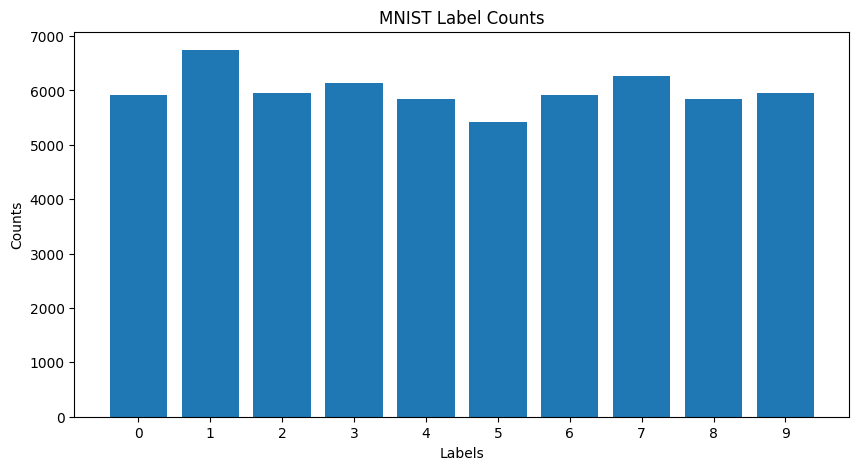

In [4]:
labelcounts = torch.bincount(label)

# Tampilkan data
plt.figure(figsize=(10, 5))
plt.bar(range(10), labelcounts)
plt.xticks(range(10), [str(i) for i in range(10)])
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('MNIST Label Counts')
plt.show()

Penjelasan:

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat
menggunakan referensi dari Job Sheet 03.


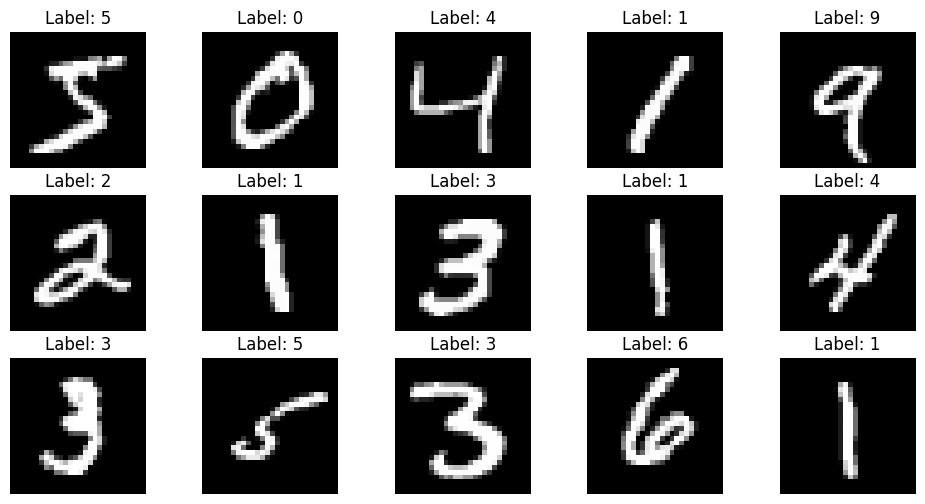

In [5]:
plt.figure(figsize=(12, 6))

for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(data_mnist[i], cmap='gray')
    plt.title(f"Label: {label[i].item()}")
    plt.axis('off')

plt.show()

3.  Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
- Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai
fitur.
- Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda
diperbolehkan melakukan ekspolarasi pada proses ini.

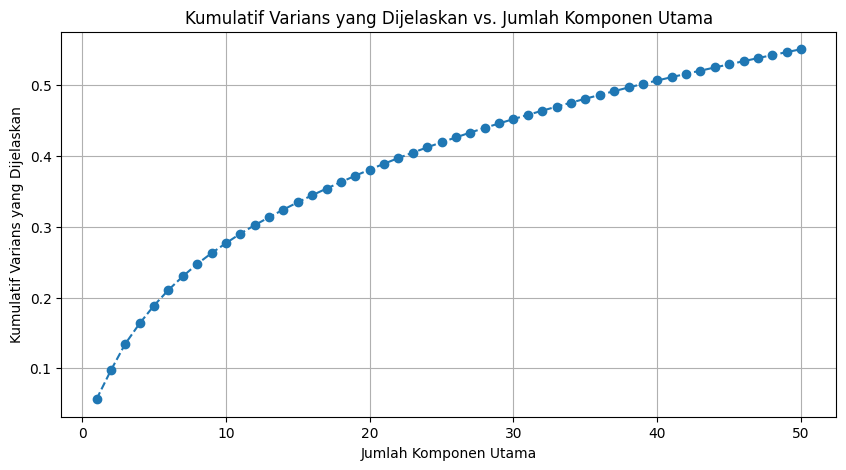

In [6]:
# Menganalisis dan preprocessing data.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Mengubah bentuk (reshape) array data.
data = data_mnist.reshape(data_mnist.shape[0], -1)

# Standarisasi data (rata-rata=0, varians=1)
scaler_data = StandardScaler()
datastd = scaler_data.fit_transform(data)

# Melakukan PCA dengan jumlah komponen yang diinginkan
n_components = 50
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(datastd)

# Menampilkan rasio varians yang dijelaskan
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(variance_ratios)

plt.figure(figsize=(10, 5))
plt.plot(range(1, n_components + 1),
         cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Jumlah Komponen Utama')
plt.ylabel('Kumulatif Varians yang Dijelaskan')
plt.title('Kumulatif Varians yang Dijelaskan vs. Jumlah Komponen Utama')
plt.grid()
plt.show()

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [7]:
from sklearn.model_selection import train_test_split

# Daftar Ukuran Data Uji
test_sizes = [0.3, 0.2, 0.1]

# Inisialisasi daftar kosong untuk menyimpan pembagian data
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

# Pembagian data latih-uji untuk setiap ukuran data uji
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(pca_data, label, test_size=test_size)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

# Verifikasi bentuk (shapes) dari himpunan data latih dan uji untuk setiap pembagian (split)
for i, test_size in enumerate(test_sizes):
    print(f"Split {i + 1}:")
    print(f"X_train shape: {X_train_list[i].shape}")
    print(f"y_train shape: {y_train_list[i].shape}")
    print(f"X_test shape: {X_test_list[i].shape}")
    print(f"y_test shape: {y_test_list[i].shape}")
    print()

Split 1:
X_train shape: (42000, 50)
y_train shape: torch.Size([42000])
X_test shape: (18000, 50)
y_test shape: torch.Size([18000])

Split 2:
X_train shape: (48000, 50)
y_train shape: torch.Size([48000])
X_test shape: (12000, 50)
y_test shape: torch.Size([12000])

Split 3:
X_train shape: (54000, 50)
y_train shape: torch.Size([54000])
X_test shape: (6000, 50)
y_test shape: torch.Size([6000])



5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
- Anda diperbolehkan untuk melakukan tunning parameter.
- Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
- Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
- Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
- Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet
03 sebagai acuan.

In [8]:
# 5, 6, 7 Klasifikasi menggunakan RBF Kernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rbf_kernel = SVC(kernel='rbf')

# Melatih model SVM pada data uji
rbf_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_pred = rbf_kernel.predict(X_test)

# Evaluasi model
akurasi = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mtx = confusion_matrix(y_test, y_pred)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matrix Konfusi:\n', confusion_mtx)

Akurasi: 96.97%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       594
           1       0.98      0.99      0.98       714
           2       0.97      0.98      0.97       615
           3       0.95      0.96      0.95       581
           4       0.98      0.98      0.98       564
           5       0.96      0.95      0.96       541
           6       0.97      0.98      0.98       571
           7       0.96      0.97      0.97       618
           8       0.97      0.95      0.96       599
           9       0.97      0.95      0.96       603

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matrix Konfusi:
 [[586   0   1   0   0   2   3   0   2   0]
 [  0 705   3   1   1   0   1   3   0   0]
 [  2   2 600   4   0   0   2   2   3   0]
 [  1   1   3 555   2   9   1   2   7   0]
 [  1   0   1 

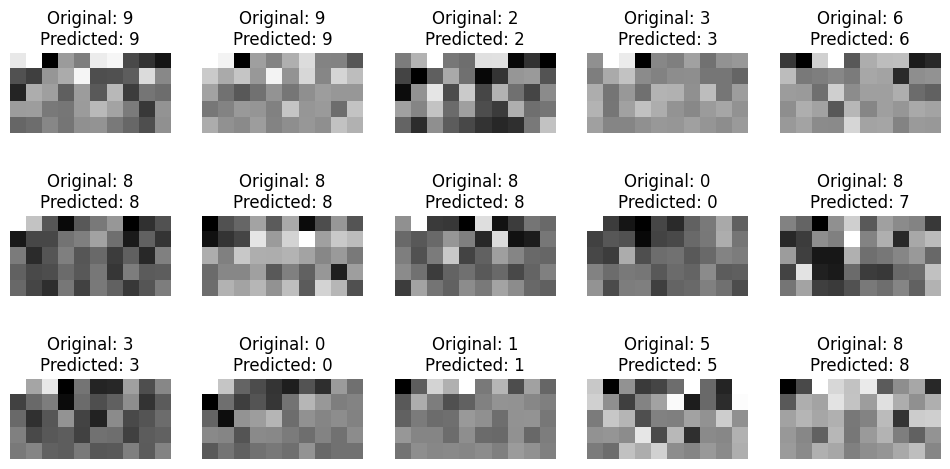

In [9]:
# Menampilkan citra data testing berserta hasil pelabelannya

plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [10]:
# 5, 6, 7 Klasifikasi menggunakan Polynomial Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

polynomial_kernel = SVC(kernel='poly', degree=3)

# Melatih model SVM pada data uji
polynomial_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = polynomial_kernel.predict(X_test)

# Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 96.63%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       594
           1       0.98      0.98      0.98       714
           2       0.97      0.96      0.96       615
           3       0.96      0.93      0.95       581
           4       0.97      0.98      0.97       564
           5       0.96      0.95      0.96       541
           6       0.98      0.99      0.98       571
           7       0.98      0.97      0.97       618
           8       0.93      0.97      0.95       599
           9       0.96      0.94      0.95       603

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Matriks Konfusi:
 [[580   0   1   0   0   4   2   0   6   1]
 [  0 702   4   2   2   0   1   1   2   0]
 [  2   2 592   4   2   0   2   1   9   1]
 [  1   1   3 543   2  13   0   1  15   2]
 [  0   0   1

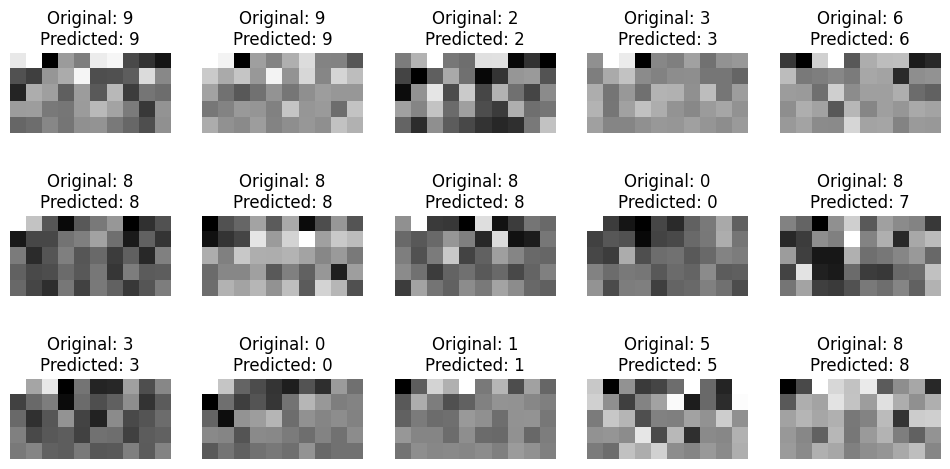

In [11]:
# Menampilkan citra data testing berserta hasil pelabelannya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [12]:
# 5, 6, 7 Klasifikasi menggunakan Sigmoid Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sigmoid_kernel = SVC(kernel='sigmoid', degree=3)

# Melatih model SVM pada data uji
sigmoid_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = sigmoid_kernel.predict(X_test)

# Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 78.28%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.71      0.86      0.78       594
           1       0.89      0.94      0.92       714
           2       0.77      0.72      0.74       615
           3       0.74      0.78      0.76       581
           4       0.83      0.83      0.83       564
           5       0.70      0.66      0.68       541
           6       0.88      0.81      0.84       571
           7       0.75      0.82      0.79       618
           8       0.81      0.68      0.74       599
           9       0.75      0.69      0.72       603

    accuracy                           0.78      6000
   macro avg       0.78      0.78      0.78      6000
weighted avg       0.78      0.78      0.78      6000

Matriks Konfusi:
 [[508   0  19   4   2  43   9   2   4   3]
 [  1 673   8   9   0   3   1   4  13   2]
 [ 43  19 441  23  11   7  35   9  12  15]
 [ 12   9  27 456   5  26   0  21  16   9]
 [ 12   2   8

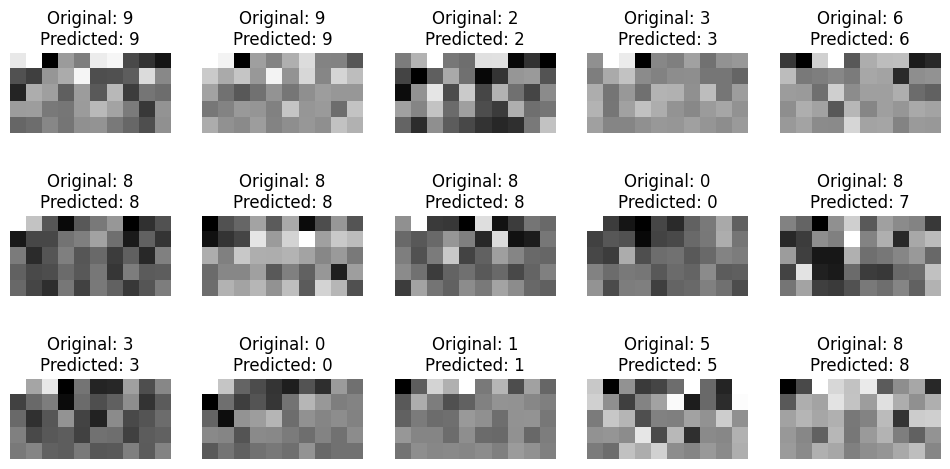

In [13]:
# Menampilkan citra data testing
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [14]:
# 5, 6, 7 Klasifikasi menggunakan Naive Bayes Kernel

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model Naive Bayes dengan kernel Gaussian
naive_bayes_model = GaussianNB()

# Melatih model pada data pelatihan
naive_bayes_model.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = naive_bayes_model.predict(X_test)

# Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 71.50%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86       594
           1       0.84      0.93      0.88       714
           2       0.65      0.59      0.62       615
           3       0.80      0.55      0.65       581
           4       0.72      0.85      0.78       564
           5       0.81      0.60      0.69       541
           6       0.92      0.70      0.79       571
           7       0.87      0.43      0.57       618
           8       0.49      0.79      0.60       599
           9       0.59      0.73      0.65       603

    accuracy                           0.71      6000
   macro avg       0.75      0.71      0.71      6000
weighted avg       0.75      0.71      0.71      6000

Matriks Konfusi:
 [[558   0  12   3   0   7   3   0  11   0]
 [  0 667   8   1   1   2   3   2  30   0]
 [ 28   9 363  24  39   8  19   0 118   7]
 [ 21  18  26 322   2  25   0   8 155   4]
 [  0   9  34

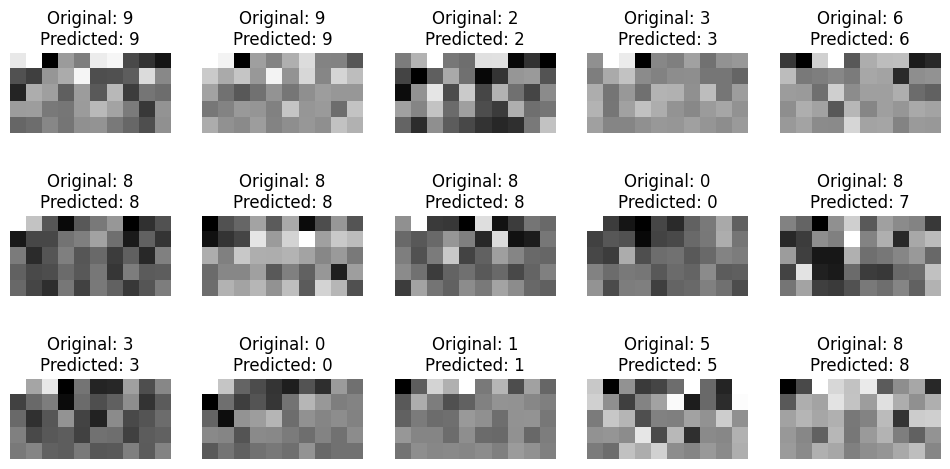

In [15]:
# Menampilkan citra data testing beserta label prediksi
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Original: {y_test[i]}\nPredicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

In [16]:
# 5, 6, 7 Klasifikasi menggunakan Linear Kernel

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

linear_kernel = SVC(kernel='linear')

# Melatih model SVM pada data uji
linear_kernel.fit(X_train, y_train)

# Memprediksi label pada data uji
y_predict = linear_kernel.predict(X_test)

# Evaluasi Model
akurasi = accuracy_score(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)
confusion_mtx = confusion_matrix(y_test, y_predict)

accuracy_percentage = akurasi * 100

print(f'Akurasi: {accuracy_percentage:.2f}%')
print('Laporan Klasifikasi:\n', classification_rep)
print('Matriks Konfusi:\n', confusion_mtx)

Akurasi: 92.52%
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       594
           1       0.95      0.97      0.96       714
           2       0.91      0.93      0.92       615
           3       0.88      0.90      0.89       581
           4       0.92      0.95      0.94       564
           5       0.89      0.86      0.88       541
           6       0.94      0.96      0.95       571
           7       0.93      0.95      0.94       618
           8       0.91      0.87      0.89       599
           9       0.94      0.88      0.91       603

    accuracy                           0.93      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.93      0.93      0.92      6000

Matriks Konfusi:
 [[576   0   3   0   1   6   7   0   1   0]
 [  0 696   3   3   1   0   1   2   8   0]
 [  4   6 572   5   8   0  10   2   7   1]
 [  2   5  11 521   1  21   2   5  12   1]
 [  3   1   2

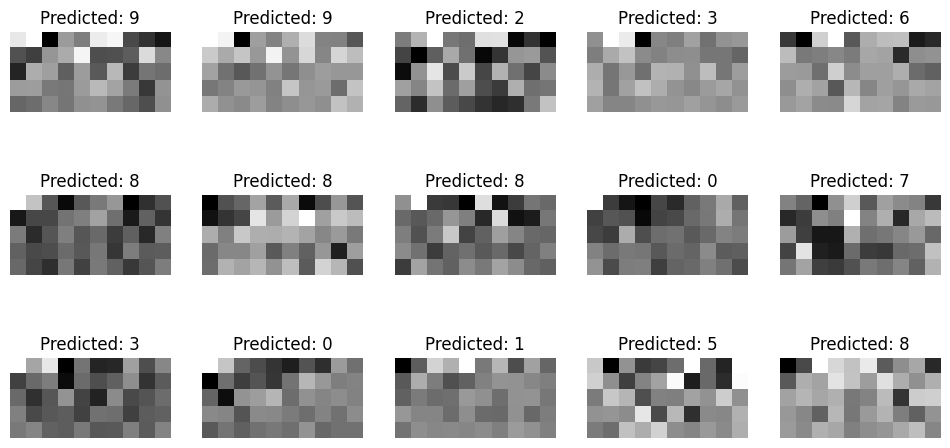

In [17]:
# Menampilkan citra dari data testing
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[i].reshape(5, 10), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')

plt.show()

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi
yang didapatkan? Jelaskan!